In [14]:
using LinearAlgebra
using PyPlot
using LaTeXStrings
using Statistics
rc("text", usetex=false) 
rc("mathtext", fontset="cm")
rc("font", family="serif", serif="cmr10", size=12)
rc("axes.formatter", use_mathtext = true)

function construct_M(N,ω,D_T,D_R,D,α,η,γ,v0,λ)
    M = zeros(N,N)
    du = ones(N-1)*(-im*0.5*ω*v0)
    dl = ones(N-1)*(-im*0.5*ω*v0)
    d = [-ω^2*D_T-(k-1)^2*D_R for k ∈ 1:N]
    d = convert(Vector{ComplexF64},d)
    M = Tridiagonal(dl,d,du)
    M = convert(Matrix{ComplexF64},M)
    M[2,1] += -im*0.5*ω*v0
    M[2,1] += im*2*pi*fast*γ*ω*η/(D*ω^2+α)
    if N >= 3
        M[3,1] += -λ*2*pi*fast*γ*ω^2*η/(D*ω^2+α)
    end
    return M
end

function sigmaAC(v0,γ,D_T,λ,ω)
    return -0.5*ω^2*v0^2+(γ*v0*ω^2)/(2*(ω^2+1))-ω^2*D_T
end

sigmaAC (generic function with 1 method)

In [15]:
ω = 2*pi
D_T = 0.01
D_R = 1.0
D = 1.0
η = 1.0
α = 1.0
fast = 1/(2*pi)

howmany = 200
maxgamma = 500
maxv0 = 10
# Fig 3a
λ = 0.0
vs = range(0,maxv0,howmany)
γs = range(0,maxgamma,howmany)

heatmaps = []
# Fig 3a
Ns = [2,8,40]

3-element Vector{Int64}:
  2
  8
 40

In [16]:
for N ∈ Ns
    heatmap = zeros(howmany,howmany)
    for i ∈ 1:size(vs)[1], j ∈ 1:size(γs)[1]
        γ = γs[j]
        v0 = vs[i]
        M1 = construct_M(N,ω,D_T,D_R,D,α,η,γ,v0,λ)
        bigλ = eigvals(M1)[end]
        heatmap[i,j] = real(bigλ)
    end
    push!(heatmaps,heatmap)
end

heatmapσ0 = zeros(howmany,howmany)
for i ∈ 1:size(vs)[1], j ∈ 1:size(γs)[1]
    γ = γs[j]
    v0 = vs[i]
    heatmapσ0[i,j] = sigmaAC(v0,γ,D_T,λ,ω)
end

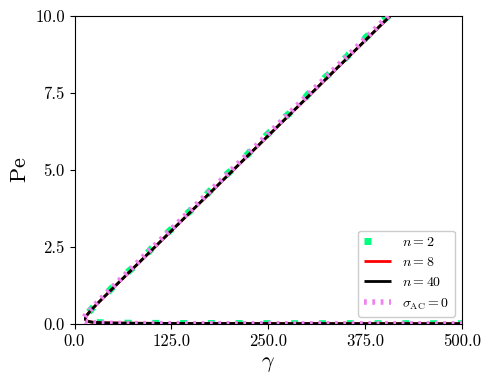

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(5,4))
images = []
labels1 = []
# Fig 3a styles
linestyles1 = [[(0, (1.0, 3.0))],"solid","solid"]
linewidths1 = [5.0,2.0,2.0]
colors1 = ["springgreen","red","black"]

for iN ∈ 1:size(Ns)[1]
    push!(images,axs.contour(heatmaps[iN],levels=[0.0],linewidths=linewidths1[iN],linestyles=linestyles1[iN],colors=colors1[iN],zorder=2*iN))
    h,_ = images[iN].legend_elements()
    push!(labels1,h[1])
end

# Fig 3a
push!(images,axs.contour(heatmapσ0,levels=[0.0],colors="violet",linestyles=[(0, (0.5, 1.0))],linewidths=4.0,zorder=8))
h,_ = images[end].legend_elements()
push!(labels1,h[1])

axs.set_ylim(0,howmany-1)
axs.set_xlim(0,howmany-1)
axs.set_ylabel(L"$\mathrm{Pe}$",fontsize=16)
axs.set_xlabel(L"$\gamma$",fontsize=16)
axs.set_xticks(ticks=range(0,howmany-1,5),labels=range(0,maxgamma,5),fontsize=12)
axs.set_yticks(ticks=range(0,howmany-1,5),labels=range(0,maxv0,5),fontsize=12)
axs.legend(labels1, [L"n=%$(Ns[1])",L"n=%$(Ns[2])",L"n=%$(Ns[3])",L"\sigma_{\mathrm{AC}}=0"],loc="lower right",framealpha=1.0,fontsize=10)

display(fig)
# fig.savefig("linear_instabs_λ=$(λ)_D_T=$(D_T)_k_AC2.eps",bbox_inches="tight")
close(fig)

In [12]:
# Fig 3b
λ = 0.1
vs = range(0,maxv0,howmany)
γs = range(0,maxgamma,howmany)

heatmaps = []
# Fig 3b
Ns = [2,3,4,7,8,40]

for N ∈ Ns
    heatmap = zeros(howmany,howmany)
    for i ∈ 1:size(vs)[1], j ∈ 1:size(γs)[1]
        γ = γs[j]
        v0 = vs[i]
        M1 = construct_M(N,ω,D_T,D_R,D,α,η,γ,v0,λ)
        bigλ = eigvals(M1)[end]
        heatmap[i,j] = real(bigλ)
    end
    push!(heatmaps,heatmap)
end

heatmapσ0 = zeros(howmany,howmany)
for i ∈ 1:size(vs)[1], j ∈ 1:size(γs)[1]
    γ = γs[j]
    v0 = vs[i]
    heatmapσ0[i,j] = sigmaAC(v0,γ,D_T,λ,ω)
end


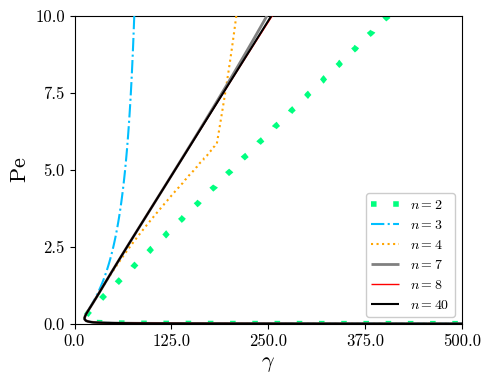

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(5,4))
images = []
labels1 = []

# Fig 3b styles
linestyles1 = [[(0, (1.0, 3.0))],"dashdot","dotted","solid","solid","solid"]
linewidths1 = [4.0,1.5,1.5,2.0,1.0,1.5]
colors1 = ["springgreen","deepskyblue","orange","grey","red","black"]

for iN ∈ 1:size(Ns)[1]
    push!(images,axs.contour(heatmaps[iN],levels=[0.0],linewidths=linewidths1[iN],linestyles=linestyles1[iN],colors=colors1[iN],zorder=2*iN))
    h,_ = images[iN].legend_elements()
    push!(labels1,h[1])
end

axs.set_ylim(0,howmany-1)
axs.set_xlim(0,howmany-1)
axs.set_ylabel(L"$\mathrm{Pe}$",fontsize=16)
axs.set_xlabel(L"$\gamma$",fontsize=16)
axs.set_xticks(ticks=range(0,howmany-1,5),labels=range(0,maxgamma,5),fontsize=12)
axs.set_yticks(ticks=range(0,howmany-1,5),labels=range(0,maxv0,5),fontsize=12)
axs.legend(labels1, [L"n=%$(Ns[1])",L"n=%$(Ns[2])",L"n=%$(Ns[3])",L"n=%$(Ns[4])",L"n=%$(Ns[5])",L"n=%$(Ns[6])"],loc="lower right",framealpha=1.0,fontsize=10)

display(fig)
# fig.savefig("linear_instabs_λ=$(λ)_D_T=$(D_T)_k.eps",bbox_inches="tight")
close(fig)

In [18]:

function construct_Mn(N,ω,D_T,α,γ,Pe,λ)
    M = zeros(N,N)
    a = -ω^2*D_T
    b = -1im*0.5*ω*Pe
    C_1 = γ*ω/(ω^2+α)
    du = ones(N-1)*(b)
    dl = ones(N-1)*(b)
    d = [a-(k-1)^2 for k ∈ 1:N]
    d = convert(Vector{ComplexF64},d)
    M = Tridiagonal(dl,d,du)
    M = convert(Matrix{ComplexF64},M)
    M[2,1] += b
    M[2,1] += 1im*C_1
    if N >= 3
        M[3,1] += -λ*ω*C_1
    end
    return M
end

function coss(θ::Float64,L::Int64)::Vector{Float64}
    return [cos((k-1)*θ) for k ∈ 1:L]
end


coss (generic function with 1 method)

In [19]:
ω = 2*pi
D_R = 1.0
D = 1.0
η = 1.0
α = 1.0
fast = 1/(2*pi)

N = 40
λ = 0.1
Pe = 3.5
D_T = 0.01
γ = 325

325

In [20]:
λ = 0.1
M1 = construct_Mn(N,ω,D_T,α,γ,Pe,λ)
v = eigvecs(M1)[:,N]
v ./= v[1]

40-element Vector{ComplexF64}:
                     1.0 + 0.0im
                    -0.0 + 1.7078862567163828im
    -0.48421749710435513 - 2.838513956310469e-17im
  -5.677027912620938e-17 + 0.1716900156278066im
     0.05046028928379738 + 1.774071222694043e-17im
   8.870356113470215e-19 - 0.012083254473039725im
   -0.002350469632578221 - 8.870356113470215e-19im
   1.385993142729721e-19 + 0.0003733774152788597im
    4.888736060100575e-5 - 2.0789897140945816e-20im
 -1.4726177141503287e-20 - 5.333326244452685e-6im
                         ⋮
  2.6109341966920114e-53 + 2.1749146321342573e-40im
   2.293096485409394e-42 - 2.5953587855246442e-55im
  -2.774777420964633e-57 - 2.2758660713221937e-44im
 -2.1299648790325783e-46 + 2.4323056091167905e-59im
   2.036968937520513e-61 + 1.882846726660007e-48im
  1.5745312647831993e-50 - 2.0077389770803113e-63im
  -1.611221150458854e-65 - 1.2474494946136113e-52im
  -9.376457803922166e-55 + 1.0476138108578665e-67im
   6.448029665928126e-70 + 6.6957352711818

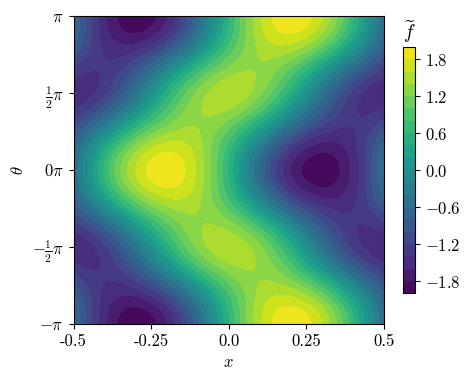

In [21]:
f0 = (x,θ) -> real(exp(1im*ω*x)*sum(v.*coss(θ,N)))
howmany2 = 1000
xs2 = range(-0.5,0.5,howmany2)
θs = range(-pi,pi,howmany2)
θ2 = [t for x∈xs2, t∈θs];
X = [x for x∈xs2, t∈θs];
z = [f0(x,t) for x∈xs2, t∈θs]

fig, axs = plt.subplots(1, 1, figsize=(5,4))
images = []
push!(images,axs.contourf(X,θ2,z,levels=20))
axs.set_xlabel(L"$x$")
axs.set_ylabel(L"$\theta$")
axs.set_yticks(ticks=range(-pi,pi,5),labels=[L"$-\pi$",L"$-\frac{1}{2}\pi$",L"$0\pi$",L"$\frac{1}{2}\pi$",L"$\pi$"],fontsize=12)
axs.set_xticks(ticks=range(-0.5,0.5,5),labels=range(-0.5,0.5,5),fontsize=12)
cb = plt.colorbar(images[1],shrink=0.8)
cb.ax.set_title(L"\widetilde{f}",fontsize=14)
display(fig)
# fig.savefig("eigf_D_T=$(D_T)_Pe=$(Pe)_γ=$(γ)_λ=$(λ)_n=$(N).eps",bbox_inches="tight")
close(fig)

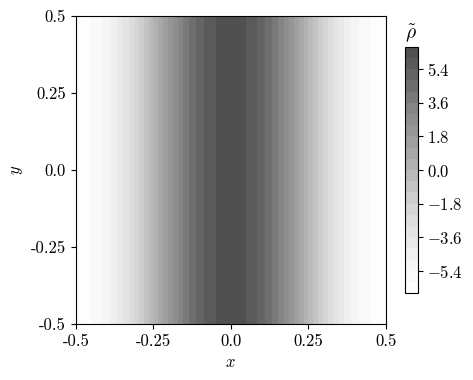

In [22]:
ρ = (x,y) -> real(exp(1im*ω*x)*v[1]*2*pi)
howmany2 = 100
xs2 = range(-0.5,0.5,howmany2)
ys2 = range(-0.5,0.5,howmany2)
X = [x for x∈xs2, y∈ys2];
Y = [y for x∈xs2, y∈ys2];
PRho = [ρ(x,y) for x∈xs2, y∈ys2]

fig, axs = plt.subplots(1, 1, figsize=(5,4))
images = []
push!(images,axs.contourf(X,Y,PRho,levels=20,cmap="Greys",alpha=0.7))
axs.set_xlabel(L"$x$")
axs.set_ylabel(L"$y$")
axs.set_xticks(ticks=range(-0.5,0.5,5),labels=range(-0.5,0.5,5),fontsize=12)
axs.set_yticks(ticks=range(-0.5,0.5,5),labels=range(-0.5,0.5,5),fontsize=12)
cb = plt.colorbar(images[1],shrink=0.8)
cb.ax.set_title(L"\tilde{\rho}",fontsize=14)
display(fig)
# fig.savefig("eigf_rho_D_T=$(D_T)_Pe=$(Pe)_γ=$(γ)_λ=$(λ)_n=$(N).pdf",bbox_inches="tight")
close(fig)